# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

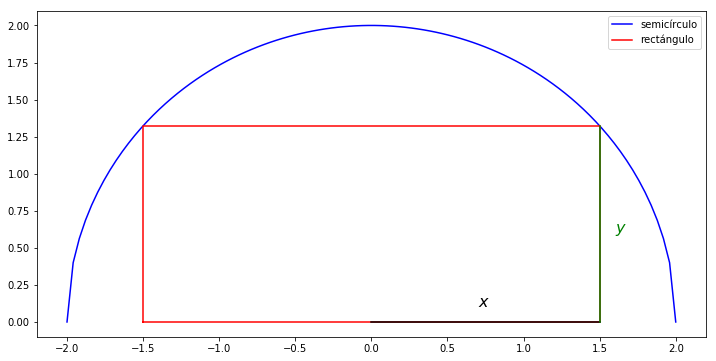

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

In [ ]:
Se desea maximizar el área del rectángulo $A_R(x,y)$

In [ ]:
El área del rectángulo es $A_R(x, y) = 2xy $

In [ ]:
Mi restricción es $ x^2 + y^2 = r^2 $, donde $ r = 2 $

In [1]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp

In [2]:
x = sp.var("x")
y = sp.var("y")

def restriccion_de_circulo(x, y, r) :
    return x**2 + y**2 - r**2

restriccion_de_circulo(x, y, 2)

x**2 + y**2 - 4

In [11]:
def AreaRectangulo(x, y) :
    return 2*x*y
AreaRectangulo(x, y)

2*x*y

In [12]:
sol_x = sp.solve(restriccion_de_circulo(x, y, 2), x)[1] # Sympy, despeja esta ecuación respecto a x
sol_x

sqrt(4 - y**2)

In [13]:
AR_y = AreaRectangulo(x,y).subs(x, sol_x)
AR_y

2*y*sqrt(4 - y**2)

In [14]:
dAR = sp.diff(AR_y, y)
dAR

-2*y**2/sqrt(4 - y**2) + 2*sqrt(4 - y**2)

In [15]:
pc = sp.solve(dAR, y)[1]
pc

sqrt(2)

In [24]:
yn = np.linspace(0, 2, 200)

# Camino 1
def AreaRectanguloY(y) :
    return 2*y*np.sqrt(4 - y**2)

# Camino 2
area_n = sp.lambdify(y, AR_y, "numpy")

area = AreaRectanguloY(yn)

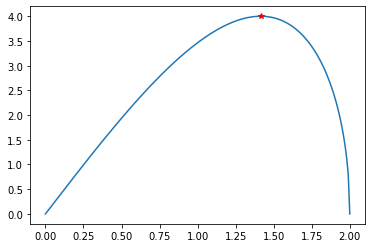

In [26]:
plt.figure()
plt.plot(yn, area)
plt.plot(np.sqrt(2), AreaRectanguloY(np.sqrt(2)), "*r")

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [21]:
sol_x

sqrt(4 - y**2)

In [22]:
b =2*sol_x.subs(y, np.sqrt(2))
b

2.82842712474619

In [23]:
h = np.sqrt(2)

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [10]:
import pandas as pd

In [4]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

In [37]:
import scipy.optimize as opt

In [38]:
c = np.array([1, # trabajadores que empiezan Lunes
              1, # trabajadores que empiezan Martes
              1, # trabajadores que empiezan Miércoles
              1, # trabajadores que empiezan Jueves
              1, # trabajadores que empiezan Viernes
              1, # trabajadores que empiezan Sábado
              1, # trabajadores que empiezan Domingo
]) # el orden de los renglones de c debe hacer match con las columnas de A y con la función de costo

A = np.array([
    #x1, #x2, #x3, #x4, #x5, #x6, #x7
    [-1, -0, -0, -1, -1, -1, -1],
    [-1, -1, -0, -0, -1, -1, -1],
    [-1, -1, -1, -0, -0, -1, -1],
    [-1, -1, -1, -1, -0, -0, -1],
    [-1, -1, -1, -1, -1, -0, -0],
    [-0, -1, -1, -1, -1, -1, -0],
    [-0, -0, -1, -1, -1, -1, -1],
])

# el orden de b debe hacer match con los renglones de A
b = np.array([
    -14, # Lunes
    -13, # Martes
    -15, # Miércoles
    -16, # Jueves
    -19, # Viernes
    -18, # Sábado
    -11  # Domingo
])


In [39]:
sol = opt.linprog(c, A, b, method="simplex")
sol

     con: array([], dtype=float64)
     fun: 22.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([0., 4., 0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([4., 7., 1., 4., 3., 3., 0.])

**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [ ]:
SEPARACIÓN

In [3]:
import pandas as pd
import scipy.optimize as opt
data = pd.read_csv("Salarios_minimos.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Salarios_minimos.csv'

**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

#### Parte 1. Regresión Lineal

In [40]:
x = data["Periodo"] - 1988
x
y = data

NameError: name 'data' is not defined

In [42]:
def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, -1])
    
    pred = X @ beta
    costo = (y - pred).T @ (y - pred)
    return costo[0][0]

In [ ]:
m = len(y)
ones = np.ones([m, 1])
x = np.reshape(list(x), [(x, [m, -1])
X = np.hstack((ones, x))
                         
beta_inicial = np.random.rand(2)
y = np.reshape

#### Parte 2. Graficar polinomios

#### Parte 3. Graficar error cuadrático contra número de términos

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.